In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data =pd.read_csv('adult.data',sep=" ", header=None)
data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,"39,","State-gov,","77516,","Bachelors,","13,","Never-married,","Adm-clerical,","Not-in-family,","White,","Male,","2174,","0,","40,","United-States,",<=50K
1,"50,","Self-emp-not-inc,","83311,","Bachelors,","13,","Married-civ-spouse,","Exec-managerial,","Husband,","White,","Male,","0,","0,","13,","United-States,",<=50K
2,"38,","Private,","215646,","HS-grad,","9,","Divorced,","Handlers-cleaners,","Not-in-family,","White,","Male,","0,","0,","40,","United-States,",<=50K
3,"53,","Private,","234721,","11th,","7,","Married-civ-spouse,","Handlers-cleaners,","Husband,","Black,","Male,","0,","0,","40,","United-States,",<=50K
4,"28,","Private,","338409,","Bachelors,","13,","Married-civ-spouse,","Prof-specialty,","Wife,","Black,","Female,","0,","0,","40,","Cuba,",<=50K


In [3]:
data = data.replace({'\$': '', ',': ''}, regex=True)
data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [4]:
data.columns = ['age','workclass','fnlwgt','education','education-num','marital-status','occupation','relationship','race','sex','capital-gain','capital-loss','hours-per-week','native-country','label']

In [5]:
data

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,label
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [6]:
label = data['label']
for i in range(len(label)):
    if (label[i] == '<=50K'):
        label[i] = 0
    elif (label[i]=='>50K'):
        label[i] = 1
data['label'] = label
data.head(10)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,label
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,0
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,0
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,1
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,1
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,1


In [7]:
cols=['workclass','education','marital-status','occupation','relationship','race','sex','native-country']
for i in cols:
    print(i ,':', data[i].unique(),len(data[i].unique()))

workclass : ['State-gov' 'Self-emp-not-inc' 'Private' 'Federal-gov' 'Local-gov' '?'
 'Self-emp-inc' 'Without-pay' 'Never-worked'] 9
education : ['Bachelors' 'HS-grad' '11th' 'Masters' '9th' 'Some-college' 'Assoc-acdm'
 'Assoc-voc' '7th-8th' 'Doctorate' 'Prof-school' '5th-6th' '10th'
 '1st-4th' 'Preschool' '12th'] 16
marital-status : ['Never-married' 'Married-civ-spouse' 'Divorced' 'Married-spouse-absent'
 'Separated' 'Married-AF-spouse' 'Widowed'] 7
occupation : ['Adm-clerical' 'Exec-managerial' 'Handlers-cleaners' 'Prof-specialty'
 'Other-service' 'Sales' 'Craft-repair' 'Transport-moving'
 'Farming-fishing' 'Machine-op-inspct' 'Tech-support' '?'
 'Protective-serv' 'Armed-Forces' 'Priv-house-serv'] 15
relationship : ['Not-in-family' 'Husband' 'Wife' 'Own-child' 'Unmarried' 'Other-relative'] 6
race : ['White' 'Black' 'Asian-Pac-Islander' 'Amer-Indian-Eskimo' 'Other'] 5
sex : ['Male' 'Female'] 2
native-country : ['United-States' 'Cuba' 'Jamaica' 'India' '?' 'Mexico' 'South'
 'Puerto-Rico

In [8]:
data.replace('?', np.nan, inplace=True)

In [9]:
data.isnull().sum()

age                  0
workclass         1836
fnlwgt               0
education            0
education-num        0
marital-status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     583
label                0
dtype: int64

In [10]:
cc=['workclass','occupation','native-country']
for i in cc:
    print(i ,':', data[i].value_counts())

workclass : Private             22696
Self-emp-not-inc     2541
Local-gov            2093
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: workclass, dtype: int64
occupation : Prof-specialty       4140
Craft-repair         4099
Exec-managerial      4066
Adm-clerical         3770
Sales                3650
Other-service        3295
Machine-op-inspct    2002
Transport-moving     1597
Handlers-cleaners    1370
Farming-fishing       994
Tech-support          928
Protective-serv       649
Priv-house-serv       149
Armed-Forces            9
Name: occupation, dtype: int64
native-country : United-States                 29170
Mexico                          643
Philippines                     198
Germany                         137
Canada                          121
Puerto-Rico                     114
El-Salvador                     106
India                           100
Cuba                             95
E

In [11]:
cc=cc=['workclass','occupation','native-country']
for i in cc:
    data[i].fillna(data[i].dropna().mode()[0],inplace=True)

In [12]:
data.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
label             0
dtype: int64

In [13]:
data.dtypes

age               object
workclass         object
fnlwgt            object
education         object
education-num     object
marital-status    object
occupation        object
relationship      object
race              object
sex               object
capital-gain      object
capital-loss      object
hours-per-week    object
native-country    object
label              int64
dtype: object

In [14]:
data[['age','fnlwgt','education-num','capital-gain','capital-loss','hours-per-week','label']]=data[['age','fnlwgt','education-num','capital-gain','capital-loss','hours-per-week','label']].astype(str).astype(int)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int32 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int32 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int32 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int32 
 11  capital-loss    32561 non-null  int32 
 12  hours-per-week  32561 non-null  int32 
 13  native-country  32561 non-null  object
 14  label           32561 non-null  int32 
dtypes: int32(7), object(8)
memory usage: 2.9+ MB


In [15]:
data.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,label
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0


In [16]:
d=data['native-country'].value_counts().to_dict()

In [17]:
data['native-country']=data['native-country'].map(d)

In [18]:
data.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,label
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,29753,0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,29753,0
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,29753,0
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,29753,0
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,95,0


In [19]:
data.groupby(['workclass'])['label'].mean()

workclass
Federal-gov         0.386458
Local-gov           0.294792
Never-worked        0.000000
Private             0.210093
Self-emp-inc        0.557348
Self-emp-not-inc    0.284927
State-gov           0.271957
Without-pay         0.000000
Name: label, dtype: float64

In [20]:
data.groupby(['education'])['label'].mean()

education
10th            0.066452
11th            0.051064
12th            0.076212
1st-4th         0.035714
5th-6th         0.048048
7th-8th         0.061920
9th             0.052529
Assoc-acdm      0.248360
Assoc-voc       0.261216
Bachelors       0.414753
Doctorate       0.740920
HS-grad         0.159509
Masters         0.556587
Preschool       0.000000
Prof-school     0.734375
Some-college    0.190235
Name: label, dtype: float64

In [21]:
data.groupby(['occupation'])['label'].mean()

occupation
Adm-clerical         0.134483
Armed-Forces         0.111111
Craft-repair         0.226641
Exec-managerial      0.484014
Farming-fishing      0.115694
Handlers-cleaners    0.062774
Machine-op-inspct    0.124875
Other-service        0.041578
Priv-house-serv      0.006711
Prof-specialty       0.342637
Protective-serv      0.325116
Sales                0.269315
Tech-support         0.304957
Transport-moving     0.200376
Name: label, dtype: float64

In [22]:
data.groupby(['race'])['label'].mean()

race
Amer-Indian-Eskimo    0.115756
Asian-Pac-Islander    0.265640
Black                 0.123880
Other                 0.092251
White                 0.255860
Name: label, dtype: float64

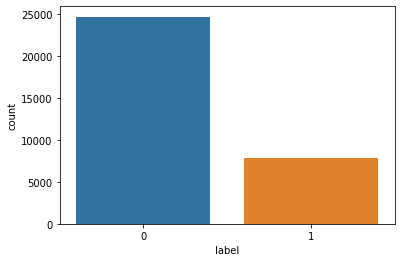

In [23]:
sns.countplot(x=data["label"])

In [24]:
X=data.iloc[:,:-1]
y=data.iloc[:,-1]

In [25]:
X.shape

(32561, 14)

In [26]:
y.shape

(32561,)

In [27]:
data1=pd.get_dummies(X,columns=['workclass','education','marital-status','occupation','race','sex','relationship'],drop_first=True)

In [28]:
data1.head()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,native-country,workclass_Local-gov,workclass_Never-worked,workclass_Private,...,race_Asian-Pac-Islander,race_Black,race_Other,race_White,sex_Male,relationship_Not-in-family,relationship_Other-relative,relationship_Own-child,relationship_Unmarried,relationship_Wife
0,39,77516,13,2174,0,40,29753,0,0,0,...,0,0,0,1,1,1,0,0,0,0
1,50,83311,13,0,0,13,29753,0,0,0,...,0,0,0,1,1,0,0,0,0,0
2,38,215646,9,0,0,40,29753,0,0,1,...,0,0,0,1,1,1,0,0,0,0
3,53,234721,7,0,0,40,29753,0,0,1,...,0,1,0,0,1,0,0,0,0,0
4,28,338409,13,0,0,40,95,0,0,1,...,0,1,0,0,0,0,0,0,0,1


In [29]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(data1,y,test_size=0.2,random_state=2)

In [30]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
X_train = ss.fit_transform(X_train)
X_test = ss.transform(X_test)

In [35]:
y_test.value_counts()

0    4928
1    1585
Name: label, dtype: int64

In [36]:
# Importing the Keras libraries and packages
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.activations import sigmoid,relu

Using TensorFlow backend.


In [37]:
Classifier=Sequential()

In [38]:
Classifier.add(Dense(activation='relu',input_dim=58,units=6,kernel_initializer='he_uniform'))

In [39]:
Classifier.add(Dense(activation='relu',units=6,kernel_initializer='he_uniform'))

In [40]:
Classifier.add(Dense(activation='sigmoid',units=1,kernel_initializer='uniform'))

In [41]:
Classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [48]:
Classifier.fit(X_train, y_train, batch_size = 10, nb_epoch = 50,validation_split=0.20)

Train on 20838 samples, validate on 5210 samples
Epoch 1/50
  340/20838 [..............................] - ETA: 3s - loss: 0.3360 - accuracy: 0.8588 

C:\Users\anudeep\anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.


20838/20838 [==============================] - 3s 159us/step - loss: 0.2980 - accuracy: 0.8602 - val_loss: 0.2873 - val_accuracy: 0.8678
Epoch 2/50
20838/20838 [==============================] - 3s 165us/step - loss: 0.2973 - accuracy: 0.8617 - val_loss: 0.2892 - val_accuracy: 0.8666
Epoch 3/50
20838/20838 [==============================] - 3s 155us/step - loss: 0.2976 - accuracy: 0.8618 - val_loss: 0.2893 - val_accuracy: 0.8679
Epoch 4/50
20838/20838 [==============================] - 4s 169us/step - loss: 0.2973 - accuracy: 0.8621 - val_loss: 0.2892 - val_accuracy: 0.8655
Epoch 5/50
20838/20838 [==============================] - 4s 173us/step - loss: 0.2971 - accuracy: 0.8617 - val_loss: 0.2905 - val_accuracy: 0.8662
Epoch 6/50
20838/20838 [==============================] - 3s 159us/step - loss: 0.2971 - accuracy: 0.8622 - val_loss: 0.2915 - val_accuracy: 0.8656
Epoch 7/50
20838/20838 [==============================] - 4s 186us/step - loss: 0.2967 - accuracy: 0.8625 - val_loss: 0.291

In [49]:
y_pred = Classifier.predict(X_test)

In [50]:
y_pred = (y_pred > 0.5)

In [51]:
from sklearn.metrics import confusion_matrix,accuracy_score
cm = confusion_matrix(y_test, y_pred)
accuracy=accuracy_score(y_test,y_pred)

In [52]:
cm

array([[4523,  405],
       [ 600,  985]], dtype=int64)

In [53]:
print(accuracy)

0.8456932289267619
